In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

#通过read_csv来读取目的数据集,返回值data_set的数据类型为DataFrame
data_set = pd.read_csv("C:/Users/MY/Desktop/数据挖掘实验/实验3：最小二乘法/data_set.csv",engine='python')


#print(data_set.head(),"\nshape:",data_set.shape)
#data_set.describe()
#列级别的判断,但凡某一列有null值或空的，则为真
#data_set.isnull().any()

#print(data_set[data_set.isnull()==True].count())

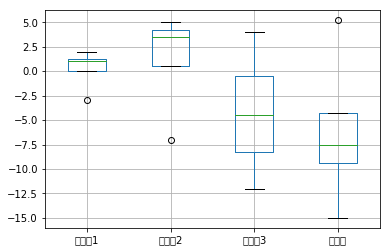

In [8]:
data_set.boxplot()
plt.savefig("boxplot.jpg")
plt.show()

In [9]:
print(data_set.corr())

          自变量1      自变量2      自变量3       因变量
自变量1  1.000000  0.993584 -0.016460  0.297713
自变量2  0.993584  1.000000 -0.120343  0.193104
自变量3 -0.016460 -0.120343  1.000000  0.945763
因变量   0.297713  0.193104  0.945763  1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


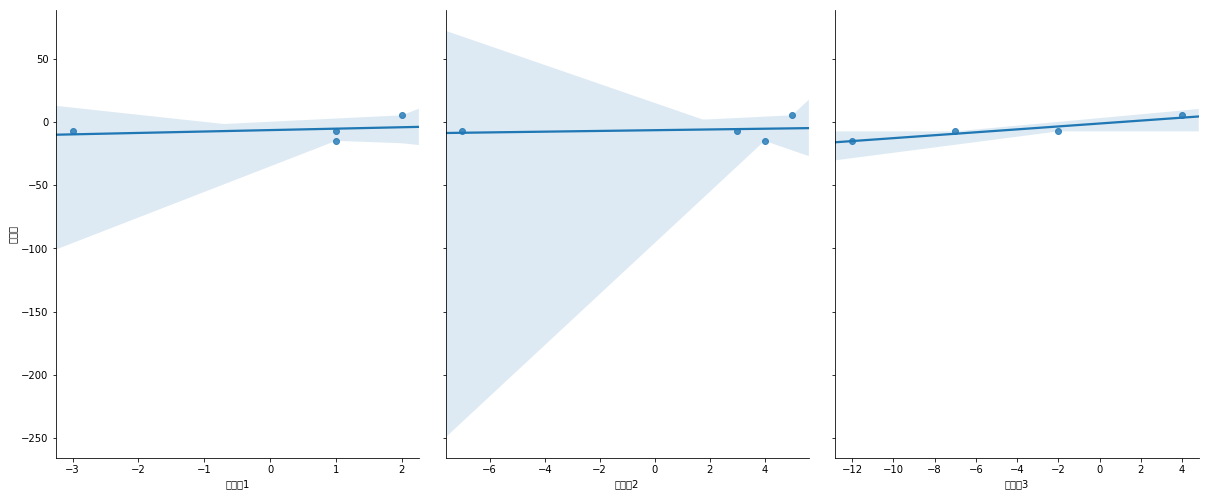

In [11]:
sns.pairplot(data_set,x_vars=['自变量1','自变量2','自变量3'],y_vars='因变量',size=7,aspect=0.8,kind='reg')
plt.savefig("pairplot.jpg")
plt.show()

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(data_set.ix[:,:3],data_set.因变量,train_size=0.8)

#print("自变量---源数据:",data_set.ix[:,:3].shape,";训练集:",X_train.shape,";测试集:",X_test.shape)
#print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [45]:
#df1=data_set.iloc[:,:3]
df1=data_set.ix[:,:3]
df2=data_set[['因变量']]
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [47]:
model=LinearRegression()
model.fit(X_train,Y_train)
a=model.intercept_
b=model.coef_
print("最佳拟合线:截距",a,"回归系数",b)

最佳拟合线:截距 -1.6574709907765557 回归系数 [0.20026778 0.44739066 1.05499554]


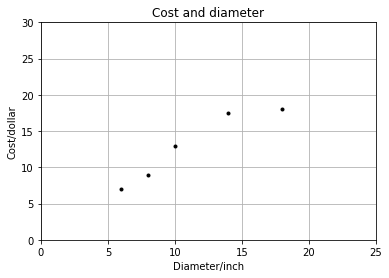

In [48]:

def runplt():
	plt.figure()
	plt.title("Cost and diameter")
	plt.xlabel("Diameter/inch")
	plt.ylabel("Cost/dollar")
	plt.axis([0,25,0,30])
	plt.grid(True)
	return plt
plt = runplt()
X = [[6],[8],[10],[14],[18]]
y = [[7],[9],[13],[17.5],[18]]
plt.plot(X,y,'k.')
plt.show()


In [50]:

#创建并拟合模型
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
print("Predict 12 inch cost:$%.2f" % model.predict([[12]]))
a=model.intercept_
b=model.coef_
print("最佳拟合线:截距",a,"回归系数",b)

Predict 12 inch cost:$13.68
最佳拟合线:截距 [1.96551724] 回归系数 [[0.9762931]]


In [52]:
from numpy import *
xMat = mat(X)
yMat = mat(y)
xTx = xMat.T*xMat
print(xTx)
if linalg.det(xTx)==0.0:
	print("The matrix is singular")
else:
	ws = xTx.I * (xMat.T*yMat)
	print(ws)


[[  5  56   5]
 [ 56 720  48]
 [  5  48   9]]
[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [54]:

from numpy.linalg import inv
from numpy import dot, transpose
import numpy as np
from sklearn.linear_model import LinearRegression
X = [[6,2],[8,1],[10,0],[14,2],[18,0]]
y = [[7],[9],[13],[17.5],[18]]
model = LinearRegression()
model.fit(X,y)
a=model.intercept_
b=model.coef_
print("最佳拟合线:截距",a,"回归系数",b)

最佳拟合线:截距 [1.1875] 回归系数 [[1.01041667 0.39583333]]
